<a href="https://colab.research.google.com/github/Shoukat-Ali123/Machine-Learning-01/blob/main/Lasso%26Rigde_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all required Packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the housing dataset file

In [2]:
data=pd.read_csv('/content/Housing_Dataset.csv')

In [4]:
data.head(30)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [8]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Number of Nan Value

In [10]:
data.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,7610
Method,0
SellerG,0
Date,0
Distance,1
Postcode,1


In [19]:
usefulCols = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Price']
newData=data[usefulCols]

In [20]:
newData.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [21]:
newData.shape

(34857, 15)

In [22]:
newData.isnull().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,3
Distance,1
CouncilArea,3
Bedroom2,8217


In [23]:
##Filling the NAN Values with zero
cols_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
newData[cols_fill_zero] = newData[cols_fill_zero].fillna(0)

/tmp/ipython-input-3698509413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData[cols_fill_zero] = newData[cols_fill_zero].fillna(0)


In [24]:
newData.isnull().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,0
Distance,0
CouncilArea,3
Bedroom2,0


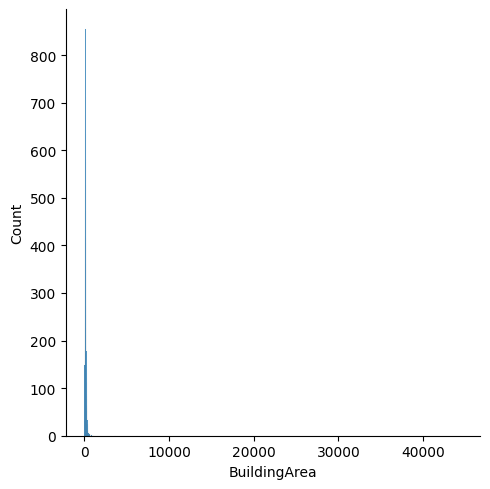

In [25]:
sns.displot(newData.BuildingArea)

/tmp/ipython-input-1369565032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newData.Landsize)


<Axes: xlabel='Landsize', ylabel='Density'>

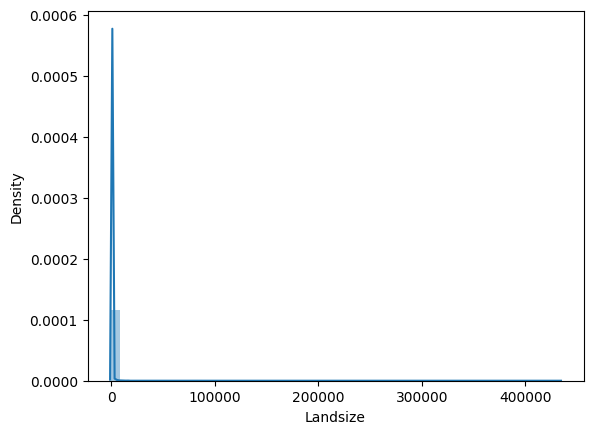

In [26]:
sns.distplot(newData.Landsize)

In [27]:

##

newData['Landsize']=newData['Landsize'].replace(np.nan, newData['Landsize'].median())

newData['BuildingArea']=newData['BuildingArea'].replace(np.nan, newData['BuildingArea'].median())
#

/tmp/ipython-input-298958658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['Landsize']=newData['Landsize'].replace(np.nan, newData['Landsize'].median())
/tmp/ipython-input-298958658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['BuildingArea']=newData['BuildingArea'].replace(np.nan, newData['BuildingArea'].median())


In [28]:
newData.shape

(34857, 15)

In [29]:
newData.isnull().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,0
Distance,0
CouncilArea,3
Bedroom2,0


In [31]:
newData.dropna(inplace=True)
newData.isnull().sum()

/tmp/ipython-input-2141412743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData.dropna(inplace=True)


,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,0
Propertycount,0
Distance,0
CouncilArea,0
Bedroom2,0


In [32]:
newData.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,136.0,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0
5,Abbotsford,3,h,PI,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,94.0,136.0,850000.0
6,Abbotsford,4,h,VB,Nelson,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,1.0,2.0,120.0,142.0,1600000.0


In [34]:
newData = pd.get_dummies(newData, drop_first=True)
newData.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,136.0,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,136.0,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [35]:
## X- input Model
## Y- target Feature
X=newData.drop('Price', axis=1)
y=newData['Price']

Splitting Data into train and test set

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
#

data modeling

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
regressor.score(X_test, y_test)
#problem overfitting

0.14829692023988994

In [44]:
regressor.score(X_train, y_train)
#

0.682698043825755

Regulariztion using Lasso(L1
)

In [45]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [46]:
lasso_reg.score(X_test, y_test)
#

0.6662000730603173

In [47]:
lasso_reg.score(X_train, y_train)

0.6765741051027789

Regularization: Ridge(L2)

In [49]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [50]:
ridge_reg.score(X_test, y_test)
#

0.6670553260220173

In [51]:
ridge_reg.score(X_train, y_train)
#

0.6622234991357131